In [12]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot: xlabel='x', ylabel='y'>

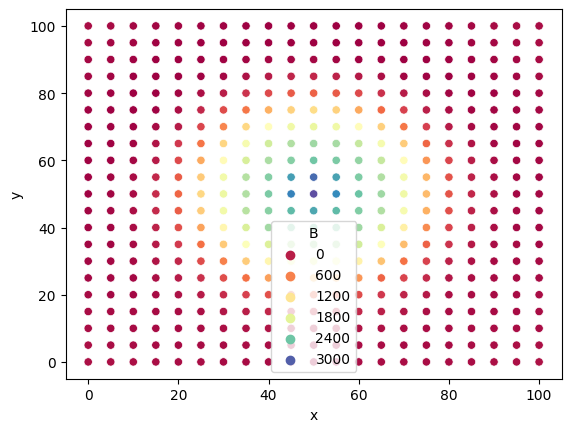

In [17]:
path_dir = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take"
file_path = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take\\1mm.dat"


# for address, dirs, files in os.walk(path_dir):
#     for file in files:
#         if ".dat" in str(file):
#             print(file)

field=pd.read_csv(file_path,encoding = 'unicode_escape',delimiter='\t',names= ['B','x','y'],skiprows=[0])
# field_np_1d = field['Filed,H'].to_numpy()
# print(field)
# field_np = field_np_1d.reshape(21,21)

sns.scatterplot(data=field, x="x", y="y", hue = 'B', palette = 'Spectral')



